# Business Context
A Food delivery business is seeing strong user sign-up numbers, but a large share of new users fail to place an order or drop off shortly after their first purchase. This behavior is hurting customer lifetime value (CLV) and making acquisition costs harder to justify. The marketing team is unsure which user segments to target and how to improve engagement post-signup.


# Project Goal
Analyze user data from Sept 2019 – Oct 2020 to:

- Identify behavioral patterns between active and inactive users

- Uncover drivers of user engagement and order frequency

- Segment users to prioritize retention efforts

- Define key metrics (e.g., ARPU, order conversion, churn rate) for business tracking



# 1. Preparing the Environment
We will import the required libraries and read in the data set.

Pandas - Data manipulation
Matplotlib and Seaborn - Data visualisation

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
### Dataset Overview
We have loaded the dataset of ~22,000 users who registered between Sept 2019 and Oct 2020. The data includes purchase behavior, device preferences, and peak ordering times. We will briefly inspect the data structure and note any key attributes. 
**Note:** This is simulated data, so trends are for illustration purposes only.



In [165]:
#Create dataframes
purchase_info = pd.read_csv('/Users/divi/workspace/GitHub/Wolt_internship case study/dataset_for_datascience_assignment.csv')

#### Data Exploration

In [167]:
#Display first few rows
purchase_info.head()


,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [168]:
# to get an overview of the data
print(purchase_info.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

In [169]:
# to get the statistical summary
purchase_info.describe()

,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,...,MAX_PURCHASE_VALUE_EUR,AVG_PURCHASE_VALUE_EUR,IOS_PURCHASES,WEB_PURCHASES,ANDROID_PURCHASES,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS
count,21983.000000,12028.000000,12028.000000,21983.00000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,...,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000
mean,3.345358,5.741686,0.372464,10992.00000,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,...,42.068043,31.195060,2.900482,1.056535,2.157133,11.501995,4.010392,64.293539,55.792135,5.961218
std,8.523171,10.536220,1.416310,6346.08982,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,...,41.176221,20.716542,7.456288,4.776431,6.876314,6.930837,2.010071,72.570103,74.963336,3.466263
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,...,1.016000,1.012000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.002000
25%,0.000000,1.000000,0.000000,5496.50000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,...,23.368000,19.228000,0.000000,0.000000,0.000000,5.000000,2.000000,18.000000,10.000000,2.950500
50%,1.000000,2.000000,0.000000,10992.00000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,...,35.560000,27.324000,0.000000,0.000000,0.000000,11.500000,4.000000,39.500000,25.000000,5.928000
75%,3.000000,6.000000,0.000000,16487.50000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,...,51.816000,38.456000,2.000000,1.000000,1.000000,18.000000,6.000000,81.000000,68.250000,8.978000
max,320.000000,320.000000,44.000000,21983.00000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,...,3048.000000,657.800000,200.000000,196.000000,221.000000,23.000000,7.000000,421.000000,421.000000,11.999000


In [170]:
# checking nulls
print(purchase_info.isnull().sum())

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

# 3. Data Cleaning

Before we start with the analysis, we must first clean the data or "scrub the dirt".

For this analysis, we will look at the more common issues such as missing and duplicate data.
We are converting dates, handled missing values (0 for no orders), and added flag 'user_active'.



In [172]:
# convert registration_date to date-time format
purchase_info['REGISTRATION_DATE'] = pd.to_datetime(purchase_info['REGISTRATION_DATE'])
# convert FIRST_PURCHASE_DAY to date-time format
purchase_info['FIRST_PURCHASE_DAY'] = pd.to_datetime(purchase_info['FIRST_PURCHASE_DAY'])
# convert LAST_PURCHASE_DAY to date-time format
purchase_info['LAST_PURCHASE_DAY'] = pd.to_datetime(purchase_info['LAST_PURCHASE_DAY'])

In [173]:
# checking the data types again
print(purchase_info.dtypes)

REGISTRATION_DATE                          datetime64[ns]
REGISTRATION_COUNTRY                               object
PURCHASE_COUNT                                      int64
PURCHASE_COUNT_DELIVERY                           float64
PURCHASE_COUNT_TAKEAWAY                           float64
FIRST_PURCHASE_DAY                         datetime64[ns]
LAST_PURCHASE_DAY                          datetime64[ns]
USER_ID                                             int64
BREAKFAST_PURCHASES                               float64
LUNCH_PURCHASES                                   float64
EVENING_PURCHASES                                 float64
DINNER_PURCHASES                                  float64
LATE_NIGHT_PURCHASES                              float64
TOTAL_PURCHASES_EUR                               float64
DISTINCT_PURCHASE_VENUE_COUNT                     float64
MIN_PURCHASE_VALUE_EUR                            float64
MAX_PURCHASE_VALUE_EUR                            float64
AVG_PURCHASE_V

In [174]:
print(purchase_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      12028 non-null  float64       
 9   LUNCH_PURCHASES                        

In [175]:
# Drop duplicates
purchase_info = purchase_info.drop_duplicates()


In [176]:
print(purchase_info.shape)

(21983, 30)


In [177]:
purchase_cols = [
    'DISTINCT_PURCHASE_VENUE_COUNT',
    'BREAKFAST_PURCHASES',
    'LUNCH_PURCHASES',
    'EVENING_PURCHASES',
    'DINNER_PURCHASES',
    'LATE_NIGHT_PURCHASES'
]

# Calculating number of NaN (missing) values before filling
nan_counts = purchase_info[purchase_cols].isnull().sum()

In [178]:
print(nan_counts)

DISTINCT_PURCHASE_VENUE_COUNT    9955
BREAKFAST_PURCHASES              9955
LUNCH_PURCHASES                  9955
EVENING_PURCHASES                9955
DINNER_PURCHASES                 9955
LATE_NIGHT_PURCHASES             9955
dtype: int64


#### Handling Missing Values

Next we will find out whether there is Null values and replace them with zero.

In [180]:
# Missing values in purchase-related columns mean the user made no orders.
# Thus, filling the missing values with 0.

purchase_info[purchase_cols] = purchase_info[purchase_cols].fillna(0)


In [181]:
# Convert the columns data type to integers
purchase_info[purchase_cols] = purchase_info[purchase_cols].astype(int)

In [182]:
# Calculate NaN values after converting
nan_counts_after = purchase_info[purchase_cols].isnull().sum()

In [183]:
print(nan_counts_after)

DISTINCT_PURCHASE_VENUE_COUNT    0
BREAKFAST_PURCHASES              0
LUNCH_PURCHASES                  0
EVENING_PURCHASES                0
DINNER_PURCHASES                 0
LATE_NIGHT_PURCHASES             0
dtype: int64


In [184]:
# Checking if the columns have converted to integer.
print(purchase_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      21983 non-null  int64         
 9   LUNCH_PURCHASES                        

### Feature Engineering

Now, we will create a calculated field for active users. It is the no. of users that have done atleast 1 order. 

In [186]:
# Creating a new column/filter for active and inactive users
purchase_info['user_active'] = purchase_info['PURCHASE_COUNT'] > 0
active_users = purchase_info[purchase_info['user_active']]


In [187]:
purchase_info.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,user_active
0,2019-09-01,DNK,0,NaN,NaN,NaT,NaT,1,0,0,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",False
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02,2020-09-02,2,0,1,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",True
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10,2020-05-25,3,0,4,...,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",True
3,2019-09-01,FIN,0,NaN,NaN,NaT,NaT,4,0,0,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",False
4,2019-09-01,GRC,0,NaN,NaN,NaT,NaT,5,0,0,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",False


In [188]:
# Filling missing values to the selected colums
purchase_cols2 = ['PURCHASE_COUNT_TAKEAWAY','IOS_PURCHASES','WEB_PURCHASES','ANDROID_PURCHASES','MIN_PURCHASE_VALUE_EUR', 'MAX_PURCHASE_VALUE_EUR', 'AVG_PURCHASE_VALUE_EUR','MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE', 'MOST_COMMON_WEEKDAY_TO_PURCHASE']
purchase_info[purchase_cols2] = purchase_info[purchase_cols2].fillna(0)

In [189]:
purchase_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  21983 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      21983 non-null  int64         
 9   LUNCH_PURCHASES                        

In [190]:
purchase_info['PURCHASE_COUNT_DELIVERY'] = purchase_info['PURCHASE_COUNT_DELIVERY'].fillna(0)

In [191]:
# Filling missing total spend with 0
# Users with no orders have missing TOTAL_PURCHASES_EUR.
# Filling with 0 because no purchases = 0€ spent.

purchase_info['TOTAL_PURCHASES_EUR'] = purchase_info['TOTAL_PURCHASES_EUR'].fillna(0)


In [192]:
purchase_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  21983 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  21983 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  datetime64[ns]
 6   LAST_PURCHASE_DAY                        12027 non-null  datetime64[ns]
 7   USER_ID                                  21983 non-null  int64         
 8   BREAKFAST_PURCHASES                      21983 non-null  int64         
 9   LUNCH_PURCHASES                        

# 4. Exploratory Data Analysis (EDA)
Since our dataset is now clean lets explore the data for insights. Looking at the fields, I am considering a few key charts to understand   the trends in the data. So they key charts are:

Key charts:
- User Funnnel 
- Users Order Distribution
- Purchase Frequency
- Registration Trends
- Device Preferences-Average Orders by Device, Average Spend by Device, Total Revenue by Device
- Days to First Order
- Spend Per Order Analysis
- Effect of Having a Valid Payment Method on Activation
- Preferred Ordering Time
- Country-wise Performance Analysis- Total Revenue, Average Order Value, Total Users


#### Lets calculate the percentage of active, non-active, one time buyer and repeat buyers percentages.

In [195]:
activation_rate = purchase_info['user_active'].mean() * 100
print(f"Activation Rate: {activation_rate:.2f}%")

Activation Rate: 54.72%


In [196]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

In [197]:
# Total users
total_users = len(purchase_info)

# Inactive users = no purchase
inactive_users = (~purchase_info['user_active']).sum()

# One-time buyers = purchase count exactly 1
one_time_buyers = (purchase_info['PURCHASE_COUNT'] == 1).sum()

# Repeat users = purchase count > 1
repeat_users = (purchase_info['PURCHASE_COUNT'] > 1).sum()

# Proportions
inactive_pct = round((inactive_users / total_users) * 100)  # ~45%
one_time_pct = round((one_time_buyers / total_users) * 100)  # ~19%
repeat_pct = round((repeat_users / total_users) * 100)  # ~36%

#print 
print(f"Non-active user percentage is: {inactive_pct}%")
print(f"One-time buyer percentage is: {one_time_pct}%")
print(f"Repeat buyers percentage is: {repeat_pct}%")


Non-active user percentage is: 45%
One-time buyer percentage is: 19%
Repeat buyers percentage is: 36%


#### Key Charts

#### a. User Funnel

/var/folders/kd/_v4w82350msg_f4j5bjw0s000000gn/T/ipykernel_7148/1293161280.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=user_funnel_df, x='Segment', y='Users', palette=colors)


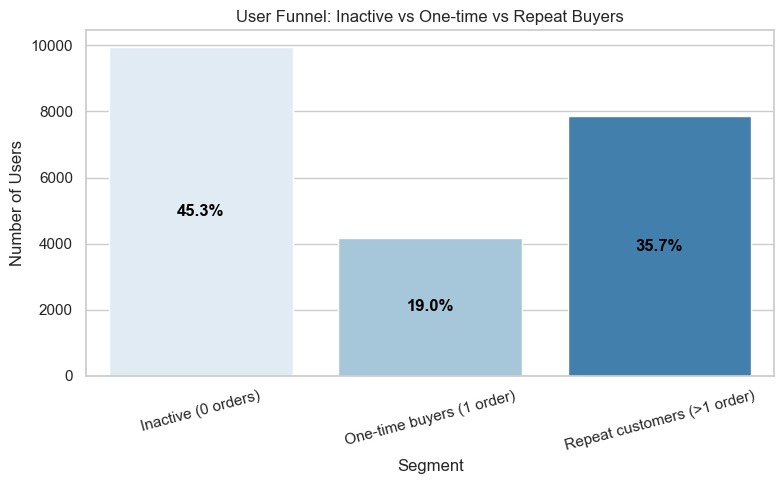

In [200]:
# Prepare data as DataFrame
user_funnel_df = pd.DataFrame({
    'Segment': ['Inactive (0 orders)', 'One-time buyers (1 order)', 'Repeat customers (>1 order)'],
    'Users': [(purchase_info['PURCHASE_COUNT'] == 0).sum(),
              (purchase_info['PURCHASE_COUNT'] == 1).sum(),
              (purchase_info['PURCHASE_COUNT'] > 1).sum()]
})

total_users = user_funnel_df['Users'].sum()

# Define colors manually (matching Blues_d palette approx)
colors = ['#deebf7', '#9ecae1', '#3182bd']

plt.figure(figsize=(8,5))
barplot = sns.barplot(data=user_funnel_df, x='Segment', y='Users', palette=colors)
plt.title("User Funnel: Inactive vs One-time vs Repeat Buyers")
plt.ylabel("Number of Users")
plt.xticks(rotation=15)

# Add percentage labels inside bars
for index, row in user_funnel_df.iterrows():
    pct = (row['Users'] / total_users) * 100
    barplot.text(index, row['Users'] / 2, f'{pct:.1f}%', color='black', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig("user_funnel_chart_with_pct.png")
plt.show()


##### b. Users Order Distribution

We will remove the outliers and check mean, median and average orders per user. We have used the IQR method to automatically identify and remove the outliers (typically values above Q3 + 1.5*IQR). Also we will use the KDE (kernel density estimate) line to help visualize the distribution shape.

Active Users Analysis (without outliers)
Total active users (after removing outliers): 10656
Average purchase count: 3.3 orders per user
Median purchase count: 2.0 orders per user
Upper bound for outliers: 13.5 orders
Number of outliers removed: 1372


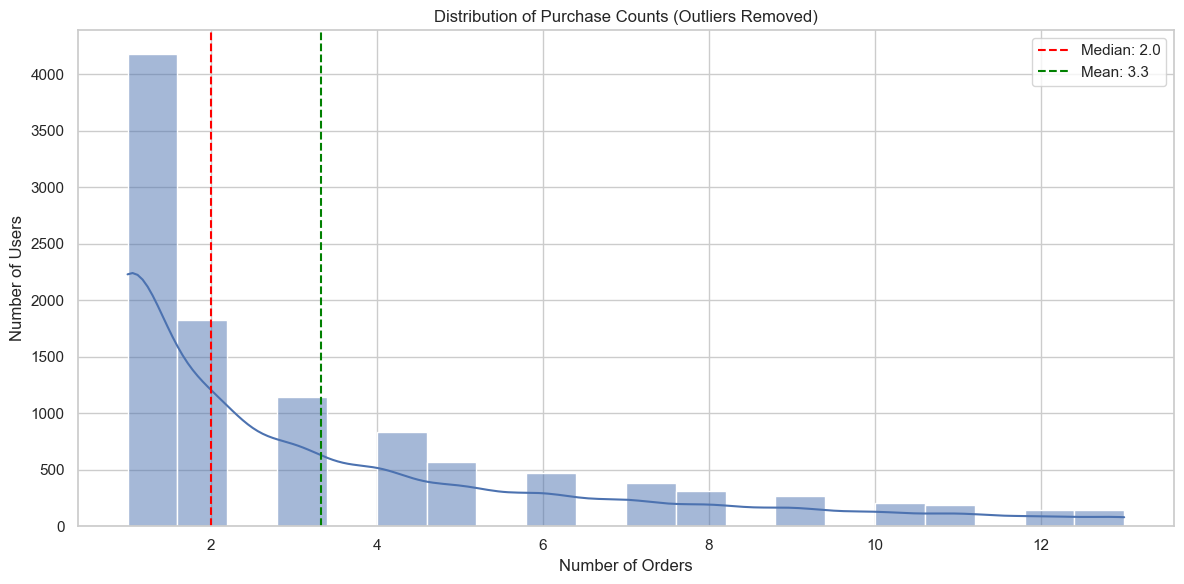


Removed Outliers (High-Volume Users):
       USER_ID  PURCHASE_COUNT REGISTRATION_COUNTRY
79          80             320                  GRC
18672    18673             221                  FIN
4850      4851             205                  GRC
4072      4073             176                  GRC
2486      2487             165                  GRC
...        ...             ...                  ...
18415    18416              14                  GRC
1158      1159              14                  DNK
10833    10834              14                  DNK
20120    20121              14                  DNK
12867    12868              14                  GRC

[1372 rows x 3 columns]


In [204]:
# Calculate IQR to identify and remove outliers
purchase_counts = active_users['PURCHASE_COUNT']
Q1 = purchase_counts.quantile(0.25)
Q3 = purchase_counts.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold (1.5*IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_users = active_users[active_users['PURCHASE_COUNT'] <= upper_bound]
filtered_counts = filtered_users['PURCHASE_COUNT']

# Basic statistics without outliers
avg_purchase_count = filtered_counts.mean()
median_purchase_count = filtered_counts.median()

# Print results
print(f"Active Users Analysis (without outliers)")
print("="*50)
print(f"Total active users (after removing outliers): {len(filtered_users)}")
print(f"Average purchase count: {avg_purchase_count:.1f} orders per user")
print(f"Median purchase count: {median_purchase_count} orders per user")
print(f"Upper bound for outliers: {upper_bound:.1f} orders")
print(f"Number of outliers removed: {len(active_users) - len(filtered_users)}")

# Create visualization
plt.figure(figsize=(12, 6))

# Histogram of purchase counts without outliers
sns.histplot(filtered_counts, bins=20, kde=True)
plt.title('Distribution of Purchase Counts (Outliers Removed)')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.axvline(median_purchase_count, color='red', linestyle='--', 
            label=f'Median: {median_purchase_count}')
plt.axvline(avg_purchase_count, color='green', linestyle='--', 
            label=f'Mean: {avg_purchase_count:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

# Show the removed outliers
outliers = active_users[active_users['PURCHASE_COUNT'] > upper_bound]
print("\nRemoved Outliers (High-Volume Users):")
print(outliers[['USER_ID', 'PURCHASE_COUNT', 'REGISTRATION_COUNTRY']].sort_values('PURCHASE_COUNT', ascending=False))


In [205]:
# Percentiles
percentile_75 = purchase_counts.quantile(0.75)
print(f"75% of users have {percentile_75:.0f} or fewer orders")
# Power users (50+ orders)
power_users = active_users[active_users['PURCHASE_COUNT'] >= 50]
num_power_users = len(power_users)
print(f"Number of power users (50+ orders): {num_power_users}")


75% of users have 6 or fewer orders
Number of power users (50+ orders): 109


On an average the order frequency per customer is 3.3 orders. 75% of the users order 6 or fewer orders. There are 109 customers who have ordered more than 50 times. 

In [207]:
# Top 10 users by purchase count
print("\nTop 10 Users by Purchase Count:")
print(active_users.nlargest(10, 'PURCHASE_COUNT')[['USER_ID', 'PURCHASE_COUNT', 'REGISTRATION_COUNTRY']])


Top 10 Users by Purchase Count:
       USER_ID  PURCHASE_COUNT REGISTRATION_COUNTRY
79          80             320                  GRC
18672    18673             221                  FIN
4850      4851             205                  GRC
4072      4073             176                  GRC
2486      2487             165                  GRC
18771    18772             144                  FIN
1578      1579             133                  FIN
9402      9403             132                  GRC
1838      1839             130                  FIN
3360      3361             125                  FIN


Greece has the highest purchase count with 320 orders which is most likely a business account. We should further investigate the high-frequency users (especially the 320-order user) to understand their usage patterns.

##### b. Purchase Frequency

Purchase Frequency Analysis
Average: 64.7 days
Median: 39.9 days
25th Percentile: 18.4 days
75th Percentile: 81.7 days
Users Analyzed: 7757

Interpretation: The median user orders every 40 days (about once per month)


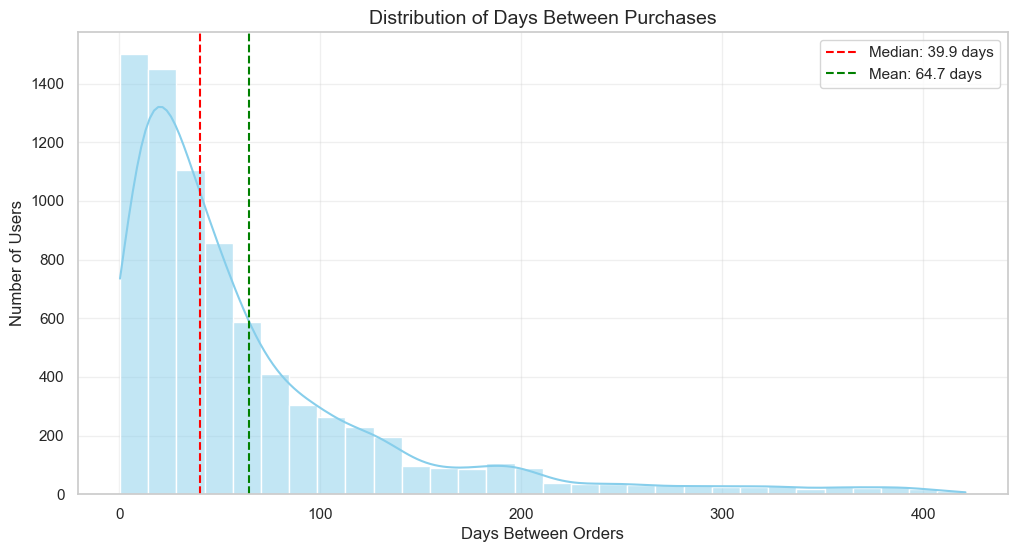

In [210]:
# Filtering for users with multiple purchases (purchase_count > 1)
multi_purchase_users = purchase_info[purchase_info['PURCHASE_COUNT'] > 1].copy()

# Calculating days between purchases for each user
def calculate_days_between(row):
    if pd.notnull(row['FIRST_PURCHASE_DAY']) and pd.notnull(row['LAST_PURCHASE_DAY']):
        time_span = (row['LAST_PURCHASE_DAY'] - row['FIRST_PURCHASE_DAY']).days
        purchase_count = row['PURCHASE_COUNT']
        return time_span / (purchase_count - 1) if (time_span > 0 and purchase_count > 1) else np.nan
    return np.nan

multi_purchase_users['DAYS_BETWEEN_PURCHASES'] = multi_purchase_users.apply(calculate_days_between, axis=1)

# Removing any NaN values that may have occurred
valid_users = multi_purchase_users.dropna(subset=['DAYS_BETWEEN_PURCHASES'])
days_between_purchases = valid_users['DAYS_BETWEEN_PURCHASES']

# Calculate statistics
stats = {
    'Average': days_between_purchases.mean(),
    'Median': days_between_purchases.median(),
    '25th Percentile': days_between_purchases.quantile(0.25),
    '75th Percentile': days_between_purchases.quantile(0.75),
    'Users Analyzed': len(valid_users)
}

# Print results
print("Purchase Frequency Analysis")
print("="*50)
for stat, value in stats.items():
    if stat == 'Users Analyzed':
        print(f"{stat}: {value}")
    else:
        print(f"{stat}: {value:.1f} days")

print(f"\nInterpretation: The median user orders every {stats['Median']:.0f} days (about once per month)")

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(days_between_purchases, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days Between Purchases', fontsize=14)
plt.xlabel('Days Between Orders', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Add reference lines
plt.axvline(stats['Median'], color='red', linestyle='--', 
            label=f'Median: {stats["Median"]:.1f} days')
plt.axvline(stats['Average'], color='green', linestyle='--', 
            label=f'Mean: {stats["Average"]:.1f} days')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



In [211]:
print("\nUser Segments by Purchase Frequency:")
print("-"*50)
print(f"Frequent buyers (<15 days): {len(days_between_purchases[days_between_purchases < 15])} users")
print(f"Regular buyers (15-45 days): {len(days_between_purchases[(days_between_purchases >= 15) & (days_between_purchases <= 45)])} users")
print(f"Occasional buyers (>45 days): {len(days_between_purchases[days_between_purchases > 45])} users")


User Segments by Purchase Frequency:
--------------------------------------------------
Frequent buyers (<15 days): 1570 users
Regular buyers (15-45 days): 2673 users
Occasional buyers (>45 days): 3514 users


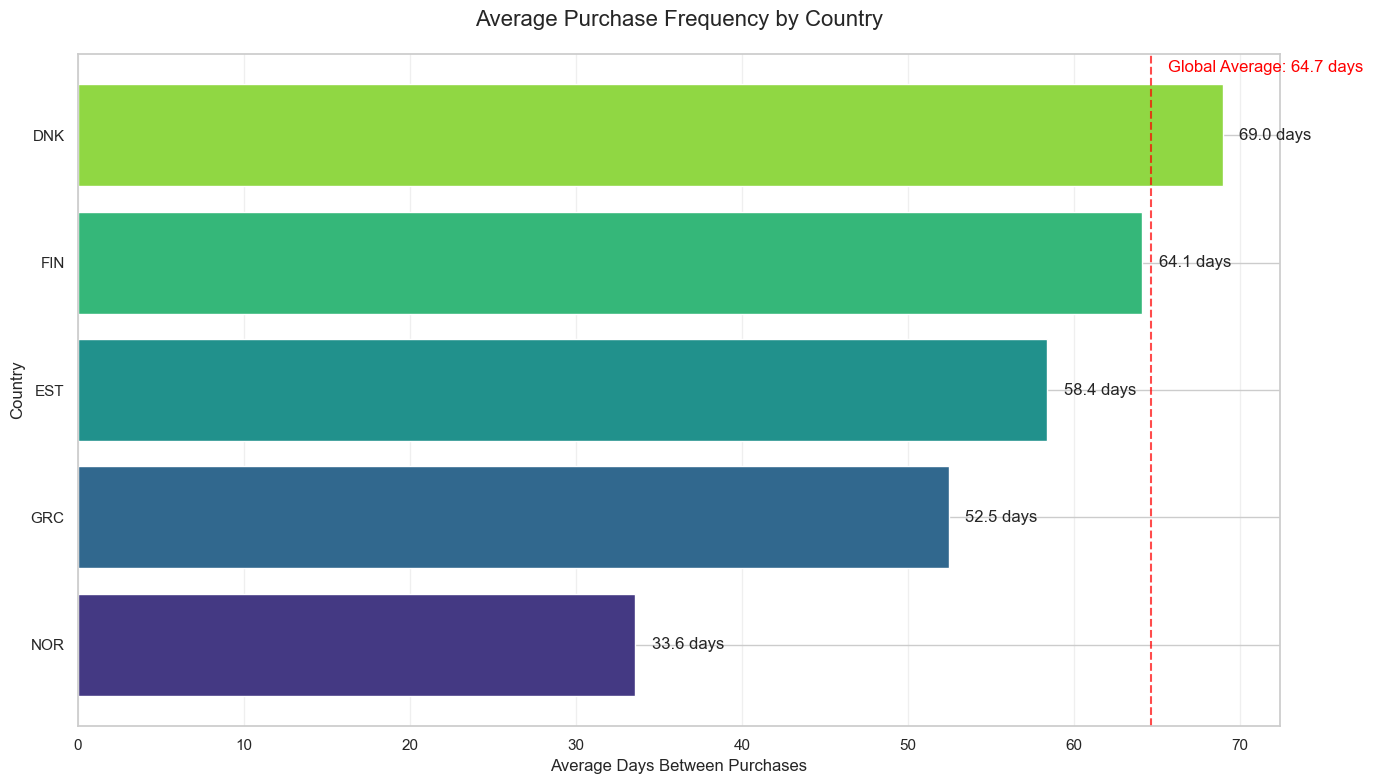

In [212]:
# Calculate purchase frequency (days between orders)
def calculate_frequency(row):
    if row['PURCHASE_COUNT'] > 1 and pd.notnull(row['FIRST_PURCHASE_DAY']) and pd.notnull(row['LAST_PURCHASE_DAY']):
        days_span = (row['LAST_PURCHASE_DAY'] - row['FIRST_PURCHASE_DAY']).days
        if days_span > 0:
            return days_span / (row['PURCHASE_COUNT'] - 1)
    return None

purchase_info['DAYS_BETWEEN_PURCHASES'] = purchase_info.apply(calculate_frequency, axis=1)

# Filtering valid users and group by country
valid_users = purchase_info.dropna(subset=['DAYS_BETWEEN_PURCHASES'])
country_stats = valid_users.groupby('REGISTRATION_COUNTRY')['DAYS_BETWEEN_PURCHASES'].agg(
    ['mean', 'median', 'count']
).sort_values('mean').reset_index()

# Filtering countries with at least 5 users for meaningful analysis
country_stats = country_stats[country_stats['count'] >= 5]

# Create the visualization
plt.figure(figsize=(14, 8))

# Horizontal bar plot - countries ordered by purchase frequency
bars = plt.barh(country_stats['REGISTRATION_COUNTRY'], 
                country_stats['mean'],
                color=sns.color_palette('viridis', len(country_stats)))

# Customize the plot
plt.title('Average Purchase Frequency by Country', fontsize=16, pad=20)
plt.xlabel('Average Days Between Purchases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, 
             bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} days',
             va='center')

# Add reference lines and annotations
mean_all = valid_users['DAYS_BETWEEN_PURCHASES'].mean()
plt.axvline(mean_all, color='red', linestyle='--', alpha=0.7)
plt.text(mean_all + 1, len(country_stats) - 0.5, 
         f'Global Average: {mean_all:.1f} days',
         color='red')

plt.tight_layout()
plt.show()



Norway (33.6 days) has the highest purchase frequency (best performance).Greece (52.5 days), Estonia (58.4 days), Finland (64.1 days), and Denmark (69.0 days) follow, with Denmark being the least frequent.Further investigation is required for Denmark and Finland to address potential barriers (e.g., pricing, customer retention) to reduce the gap with top-performing countries.

##### c. Registration Trend Over Time

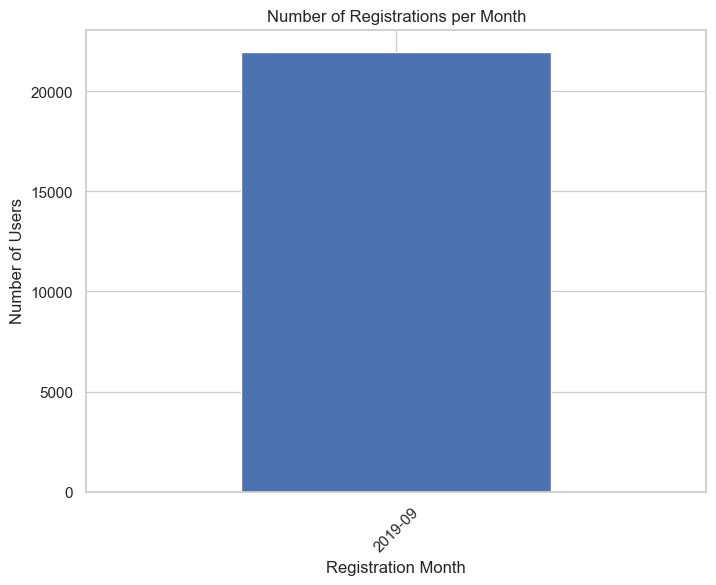

In [215]:
purchase_info['registration_month'] = purchase_info['REGISTRATION_DATE'].dt.to_period('M')
purchase_info['registration_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Registrations per Month')
plt.xlabel('Registration Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

##### d. Device Preference

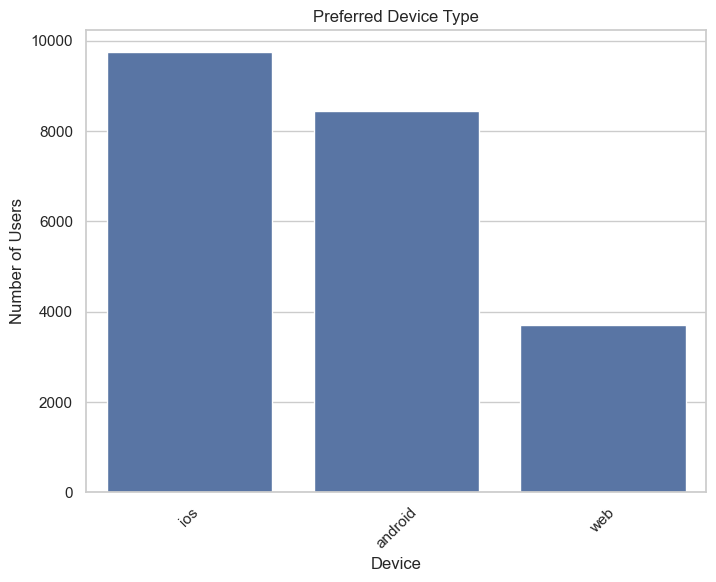

In [221]:
sns.countplot(x='PREFERRED_DEVICE', data=purchase_info)
plt.title('Preferred Device Type')
plt.xlabel('Device')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

##### iOS has the largest user base (~9,700).

##### Device Usage Analysis

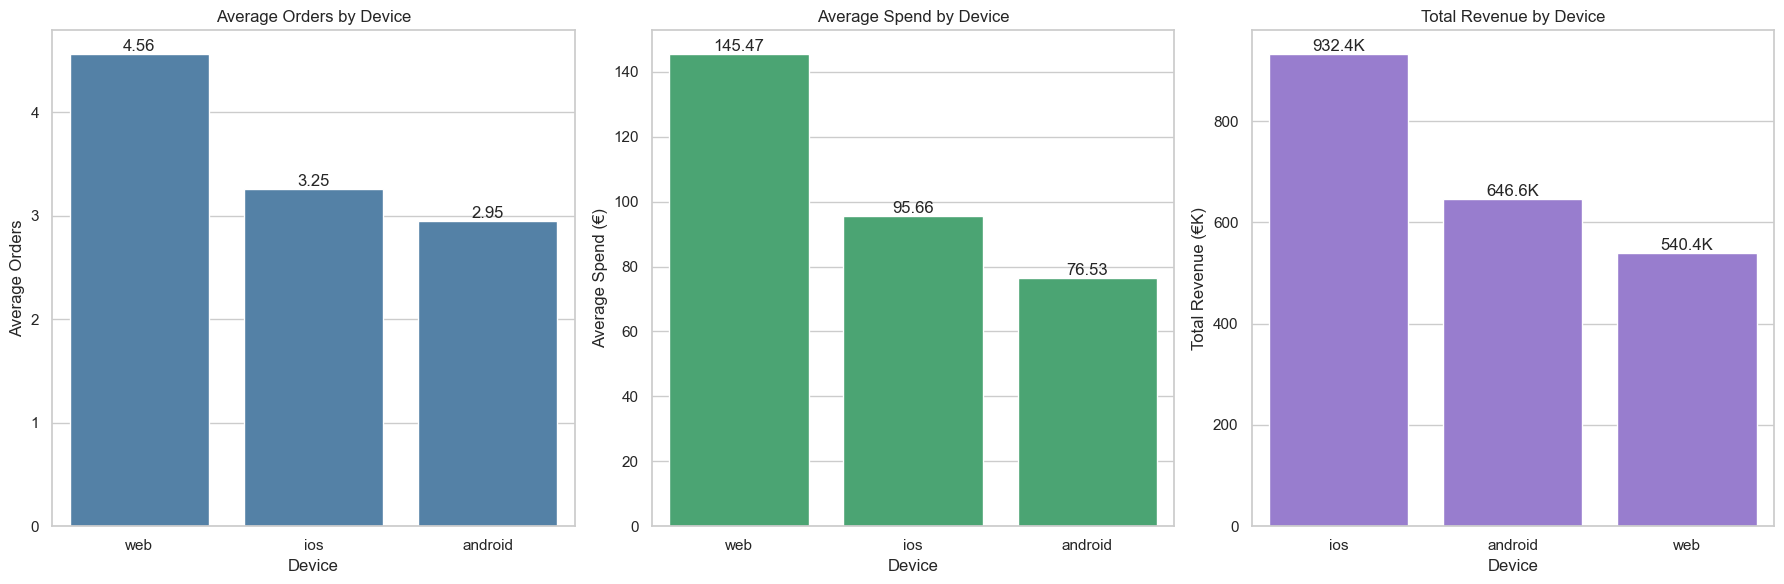

In [224]:
# Average orders and spend per device
device_orders = purchase_info.groupby('PREFERRED_DEVICE')['PURCHASE_COUNT'].mean().sort_values(ascending=False)
device_spend = purchase_info.groupby('PREFERRED_DEVICE')['TOTAL_PURCHASES_EUR'].mean().sort_values(ascending=False)
device_total_revenue = purchase_info.groupby('PREFERRED_DEVICE')['TOTAL_PURCHASES_EUR'].sum().sort_values(ascending=False)
device_total_revenue_thousands = device_total_revenue / 1000

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bars1 = sns.barplot(x=device_orders.index, y=device_orders.values, ax=axes[0], color='steelblue')
axes[0].set_title('Average Orders by Device')
axes[0].set_ylabel('Average Orders')
axes[0].set_xlabel('Device')
axes[0].bar_label(bars1.containers[0], fmt='%.2f')

bars2 = sns.barplot(x=device_spend.index, y=device_spend.values, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Average Spend by Device')
axes[1].set_ylabel('Average Spend (€)')
axes[1].set_xlabel('Device')
axes[1].bar_label(bars2.containers[0], fmt='%.2f')

bars3 = sns.barplot(x=device_total_revenue_thousands.index, y=device_total_revenue_thousands.values, ax=axes[2], color='mediumpurple')
axes[2].set_title('Total Revenue by Device')
axes[2].set_ylabel('Total Revenue (€K)')
axes[2].set_xlabel('Device')
axes[2].bar_label(bars3.containers[0], fmt='%.1fK')

plt.tight_layout()
plt.show()




##### Web Users Are the Most Valuable per Capita: 
Web users have the highest average orders and spending per user. Despite having the smallest user base, they show the strongest individual monetization. We should nurture this segment with personalized offers and loyalty programs to maximize LTV (lifetime value).

##### iOS Drives the Highest Total Revenue:
iOS has the largest user base (~9,700) and brings in the most revenue (€932.4K).Though average spend is lower than web, the scale of users compensates.We should consider to invest in user acquisition and retention on iOS, as it offers volume-driven revenue growth.

In [269]:

# Filter only rows with non-null preferred devices and at least 1 purchase
device_df = purchase_info[purchase_info['PREFERRED_DEVICE'].notnull()]

# Define device list
devices = ['IOS', 'ANDROID', 'WEB']
device_summary = []

for device in devices:
    subset = device_df[device_df['PREFERRED_DEVICE'].str.upper() == device]

    total_users = len(subset)
    repeat_users = (subset['PURCHASE_COUNT'] > 1).sum()
    repeat_rate = repeat_users / total_users * 100 if total_users > 0 else 0

    # Avoid division by zero
    if subset['PURCHASE_COUNT'].sum() > 0:
        avg_order_value = subset['TOTAL_PURCHASES_EUR'].sum() / subset['PURCHASE_COUNT'].sum()
    else:
        avg_order_value = 0

    device_summary.append({
        'Device': device,
        'Total Users': total_users,
        'Repeat Rate (%)': round(repeat_rate, 2),
        'Avg Order Value (€)': round(avg_order_value, 2)
    })

# Display as DataFrame
device_comparison_df = pd.DataFrame(device_summary)
print(device_comparison_df)



    Device  Total Users  Repeat Rate (%)  Avg Order Value (€)
0      IOS         9747            36.02                29.40
1  ANDROID         8448            31.77                25.98
2      WEB         3715            44.52                31.90


/var/folders/kd/_v4w82350msg_f4j5bjw0s000000gn/T/ipykernel_7148/1220804049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=device_comparison_df, x='Device', y='Repeat Rate (%)', palette='Blues_d')


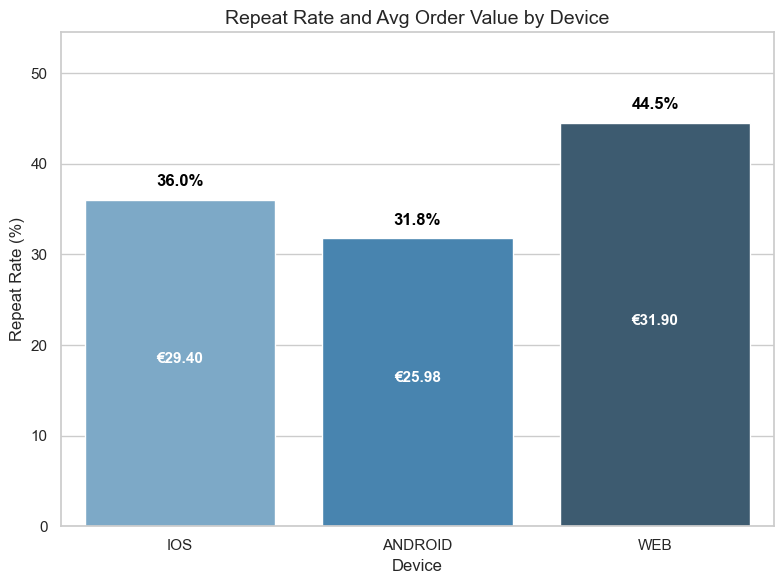

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the summary to DataFrame if not already
device_comparison_df = pd.DataFrame(device_summary)

# Create bar plot for repeat rate
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=device_comparison_df, x='Device', y='Repeat Rate (%)', palette='Blues_d')

# Annotate: percentage on top, avg order value inside
for index, row in device_comparison_df.iterrows():
    # Percentage on top
    barplot.text(index, row['Repeat Rate (%)'] + 1.5, f"{row['Repeat Rate (%)']:.1f}%", 
                 ha='center', color='black', fontsize=12, fontweight='bold')
    
    # Avg order value inside the bar
    barplot.text(index, row['Repeat Rate (%)'] / 2, f"€{row['Avg Order Value (€)']:.2f}", 
                 ha='center', color='white', fontsize=11, fontweight='bold')

# Titles and labels
plt.title("Repeat Rate and Avg Order Value by Device", fontsize=14)
plt.ylabel("Repeat Rate (%)")
plt.ylim(0, max(device_comparison_df['Repeat Rate (%)']) + 10)
plt.tight_layout()
plt.show()


##### e. Days to First Order

In [128]:
# Calculate days to first order
purchase_info['days_to_first_order'] = (purchase_info['FIRST_PURCHASE_DAY'] - purchase_info['REGISTRATION_DATE']).dt.days

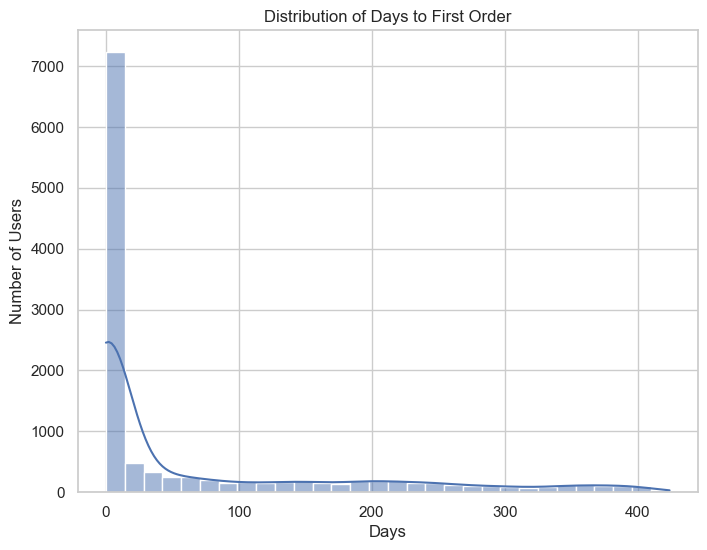

In [129]:
sns.histplot(purchase_info['days_to_first_order'].dropna(), bins=30, kde=True)
plt.title('Distribution of Days to First Order')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.show()

 The First 10 Days Are Critical for the business. Over 7,000 users placed their first order in the 0–10 day window. This early period is our "conversion golden window". 
 If users don’t convert early, the probability of them converting drops significantly over time.

In [76]:
purchase_info['DAYS_TO_FIRST_PURCHASE'] = (purchase_info['FIRST_PURCHASE_DAY'] - purchase_info['REGISTRATION_DATE']).dt.days
median_days = purchase_info['DAYS_TO_FIRST_PURCHASE'].median()
print(f"Median days to first purchase: {median_days}")

# Calculate repeat rate for users who made first purchase within 3 days
quick_order = purchase_info[purchase_info['DAYS_TO_FIRST_PURCHASE'] <= 3]
quick_repeat_pct = (quick_order['PURCHASE_COUNT'] > 1).sum() / len(quick_order) * 100
print(f"Repeat rate for users who purchased within 3 days: {quick_repeat_pct:.2f}%")

# Calculate repeat rate for users who made first purchase after 10 days
late_order = purchase_info[purchase_info['DAYS_TO_FIRST_PURCHASE'] > 10]
late_repeat_pct = (late_order['PURCHASE_COUNT'] > 1).sum() / len(late_order) * 100
print(f"Repeat rate for users who purchased after 10 days: {late_repeat_pct:.2f}%")

Median days to first purchase: 1.0
Repeat rate for users who purchased within 3 days: 64.39%
Repeat rate for users who purchased after 10 days: 65.27%


##### f. Impact of Delivery Distance on Ordering Behavior

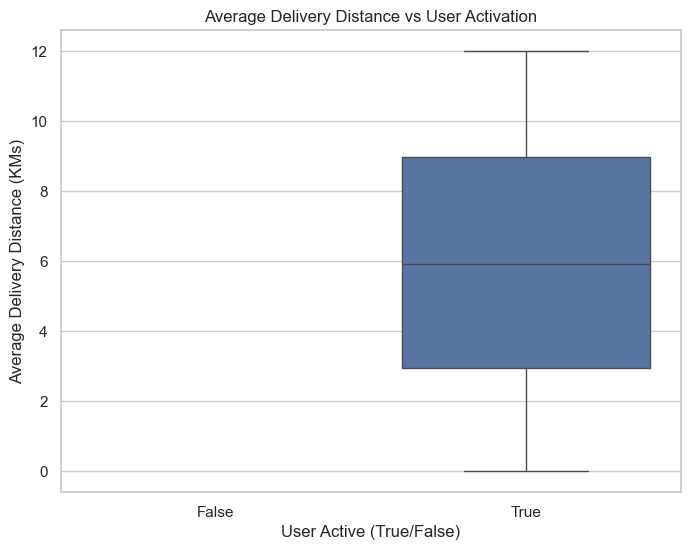

In [132]:
sns.boxplot(x='user_active', y='AVERAGE_DELIVERY_DISTANCE_KMS', data=purchase_info)
plt.title('Average Delivery Distance vs User Activation')
plt.xlabel('User Active (True/False)')
plt.ylabel('Average Delivery Distance (KMs)')
plt.show()


 The average delivery distance for the orders is between 3-9 kms.

##### g. Spend Per Order Analysis

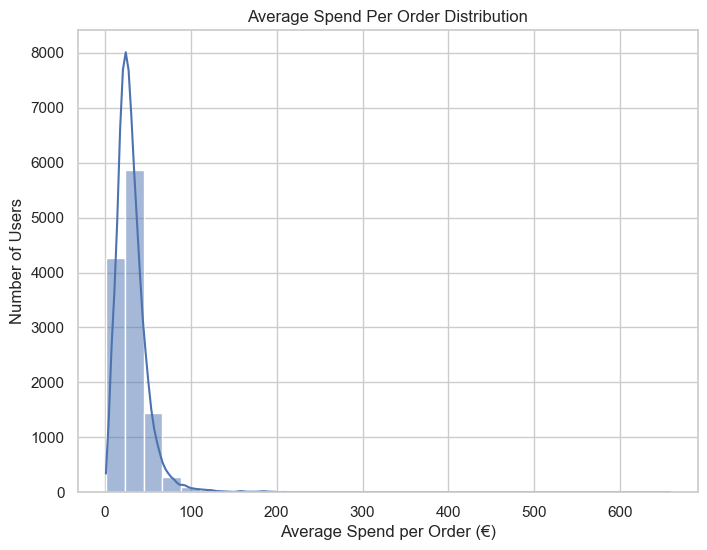

In [135]:
purchase_info['avg_spend_per_order'] = purchase_info.apply(lambda x: x['TOTAL_PURCHASES_EUR']/x['PURCHASE_COUNT'] if x['PURCHASE_COUNT'] > 0 else 0, axis=1)
sns.histplot(purchase_info[purchase_info['avg_spend_per_order'] > 0]['avg_spend_per_order'], bins=30, kde=True)
plt.title('Average Spend Per Order Distribution')
plt.xlabel('Average Spend per Order (€)')
plt.ylabel('Number of Users')
plt.show()


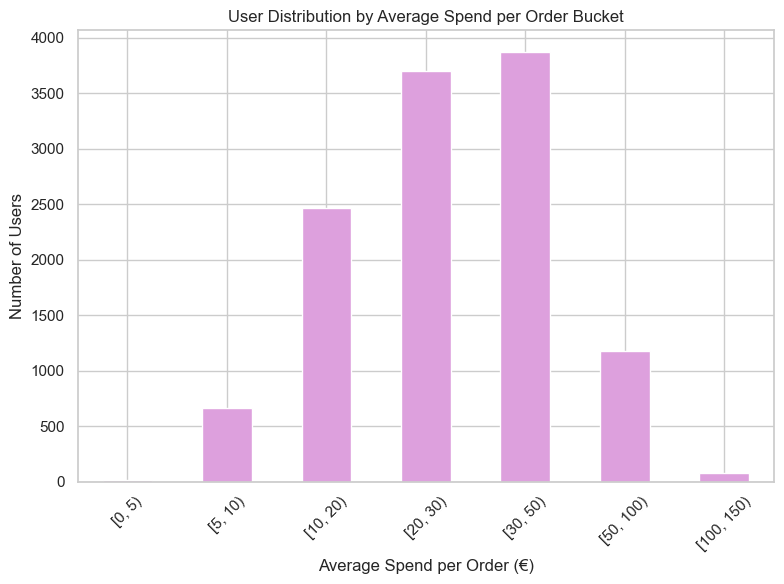

In [136]:
# Cleaned and clear spend bucket bar chart
purchase_info['avg_spend_per_order'] = purchase_info.apply(
    lambda x: x['TOTAL_PURCHASES_EUR']/x['PURCHASE_COUNT'] if x['PURCHASE_COUNT'] > 0 else 0, axis=1
)

# Filter to a sensible range for visualization
filtered_spend = purchase_info[(purchase_info['avg_spend_per_order'] > 0) & (purchase_info['avg_spend_per_order'] < 150)]
spend_bins = pd.cut(filtered_spend['avg_spend_per_order'], bins=[0, 5, 10, 20, 30, 50, 100,150], right=False)
spend_bucket_counts = spend_bins.value_counts().sort_index()

# Bar plot: Spend bucket distribution
spend_bucket_counts.plot(kind='bar', color='plum')
plt.title('User Distribution by Average Spend per Order Bucket')
plt.xlabel('Average Spend per Order (€)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The Peak Spending Range: 
Most orders fall between €30–€50 bracket.

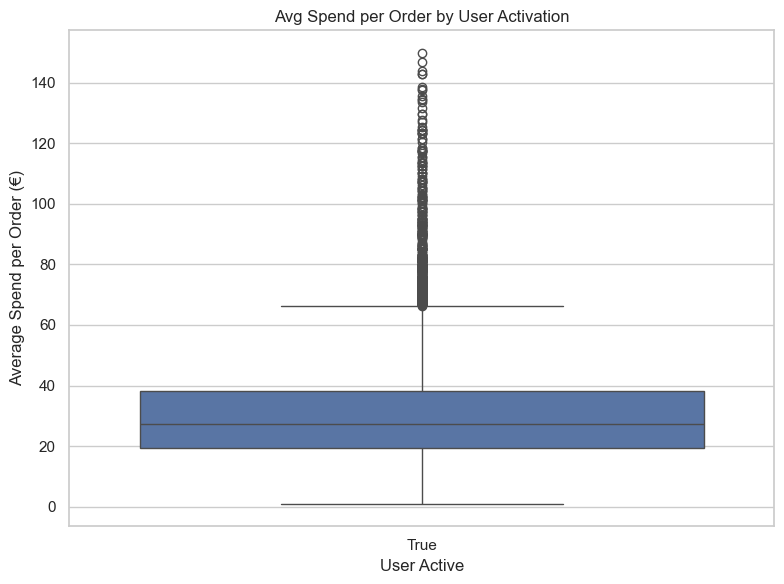

In [138]:
purchase_info['avg_spend_per_order'] = purchase_info.apply(
    lambda x: x['TOTAL_PURCHASES_EUR']/x['PURCHASE_COUNT'] if x['PURCHASE_COUNT'] > 0 else 0, axis=1
)

# Filter to a reasonable upper limit (e.g., below 150 EUR/order)
# This is done as we see outlier in the above graph so an upper limit is set.
filtered_spend = purchase_info[(purchase_info['avg_spend_per_order'] > 0) & (purchase_info['avg_spend_per_order'] < 150)]

sns.boxplot(x='user_active', y='avg_spend_per_order', data=filtered_spend)
plt.title('Avg Spend per Order by User Activation')
plt.xlabel('User Active')
plt.ylabel('Average Spend per Order (€)')
plt.tight_layout()
plt.show()


#### Active Users Spend More:
Active users(users with atleast 1 order) generate a higher average order value (AOV) compared to inactive users. So retention strategies are crucial for active users as loyal customers contribute significantly more to revenue.

##### h. Effect of Having a Valid Payment Method on Activation

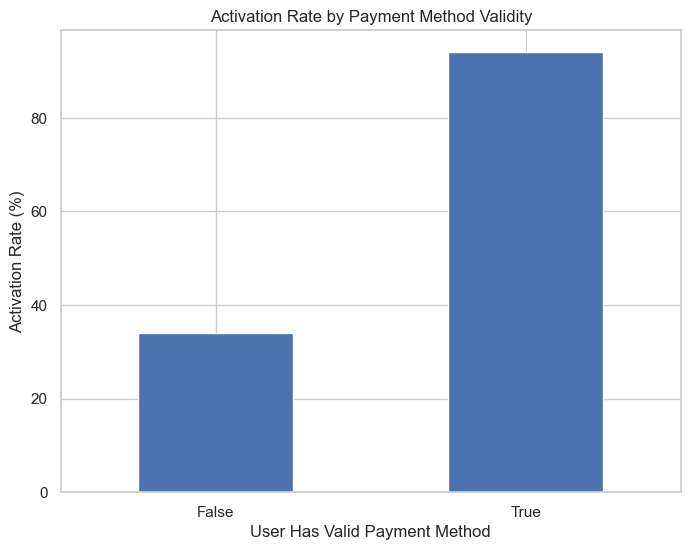

In [141]:
payment_activation = purchase_info.groupby('USER_HAS_VALID_PAYMENT_METHOD')['user_active'].mean() * 100
payment_activation.plot(kind='bar')
plt.title('Activation Rate by Payment Method Validity')
plt.xlabel('User Has Valid Payment Method')
plt.ylabel('Activation Rate (%)')
plt.xticks(rotation=0)
plt.show()

Users with valid payment methods have more chances of activation. Some payment methods have very low activation rates (<10%), while others perform exceptionally well (up to 80%).
This suggests that certain payment options significantly drive user activation, while others underperform.

#### Potential High-Performers:
If any payment method has an activation rate above 50%, it is a critical driver of conversions (e.g., digital wallets, saved cards).So promotion of these high-performing methods at checkout (e.g., default selection, incentives) may increase conversions.

##### i. Preferred Ordering Times

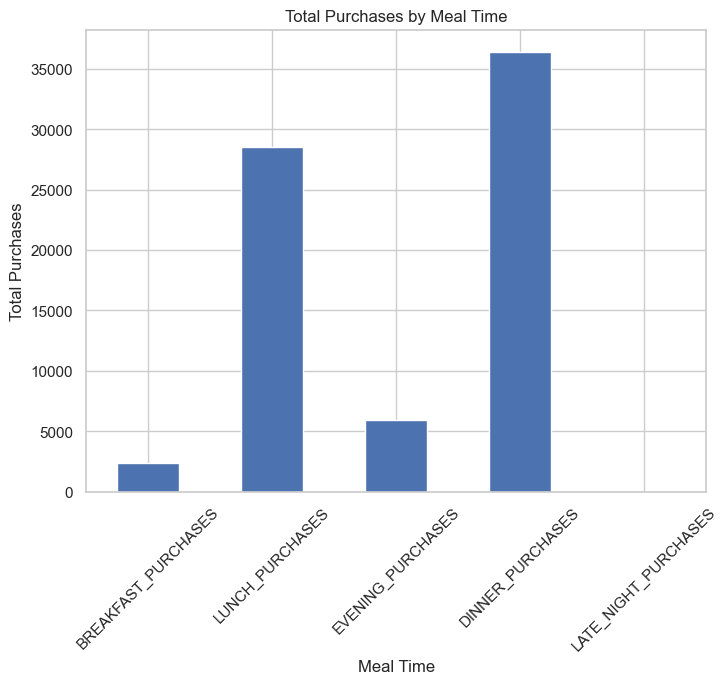

In [144]:
meal_counts = purchase_info[['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']].sum()
meal_counts.plot(kind='bar')
plt.title('Total Purchases by Meal Time')
plt.xlabel('Meal Time')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45)
plt.show()

#### Peak Order Times:
Lunch and Dinner are likely the highest-volume meal periods with total purchase numbers over 35k.Bundling offers-"Meal Deals" during lunch/dinner can increase average order value. Ensuring fastest delivery times during these high-volume windows is crucial.
Breakfast and Late-Night purchases appear significantly lower. Offering small discounts and testing promotions during slower periods may boost demand.

##### j. Country-wise Performance Analysis

In [147]:
# Total revenue, average order value, and user count by country

# Top 10 countries by total revenue, average order value, and user count

country_metrics = purchase_info.groupby('REGISTRATION_COUNTRY').agg({
    'TOTAL_PURCHASES_EUR': 'sum',
    'PURCHASE_COUNT': 'sum',
    'USER_ID': 'count'
})

country_metrics['Average_Order_Value'] = country_metrics['TOTAL_PURCHASES_EUR'] / country_metrics['PURCHASE_COUNT']
# Sort by each metric and take top 10
revenue_top10 = country_metrics.sort_values(by='TOTAL_PURCHASES_EUR', ascending=False).head(10)
avg_order_value_top10 = country_metrics.sort_values(by='Average_Order_Value', ascending=False).head(10)
users_top10 = country_metrics.sort_values(by='USER_ID', ascending=False).head(10)


##### Plot j(1): Total Revenue

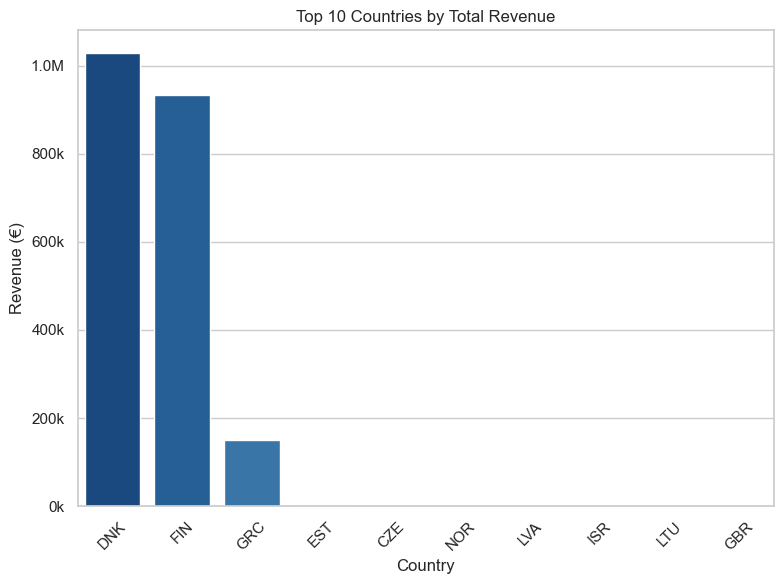

In [149]:
import matplotlib.ticker as mtick

sns.barplot(
    x='REGISTRATION_COUNTRY', 
    y='TOTAL_PURCHASES_EUR', 
    data=revenue_top10.reset_index(), 
    hue='REGISTRATION_COUNTRY', 
    palette=sns.color_palette('Blues', n_colors=10)[::-1], 
    legend=False
)
plt.title('Top 10 Countries by Total Revenue')
plt.ylabel('Revenue (€)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}k'))
plt.tight_layout()
plt.show()

##### Plot j(2): Average Order Value

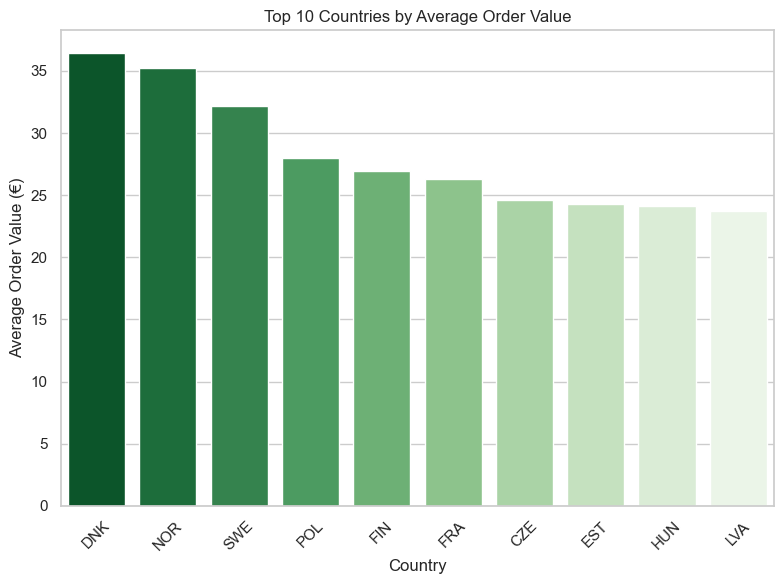

In [151]:
sns.barplot(
    x='REGISTRATION_COUNTRY', 
    y='Average_Order_Value', 
    data=avg_order_value_top10.reset_index(), 
    hue='REGISTRATION_COUNTRY', 
    palette=sns.color_palette('Greens', n_colors=10)[::-1], 
    legend=False
)
plt.title('Top 10 Countries by Average Order Value')
plt.ylabel('Average Order Value (€)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Plot j(3): Total Users

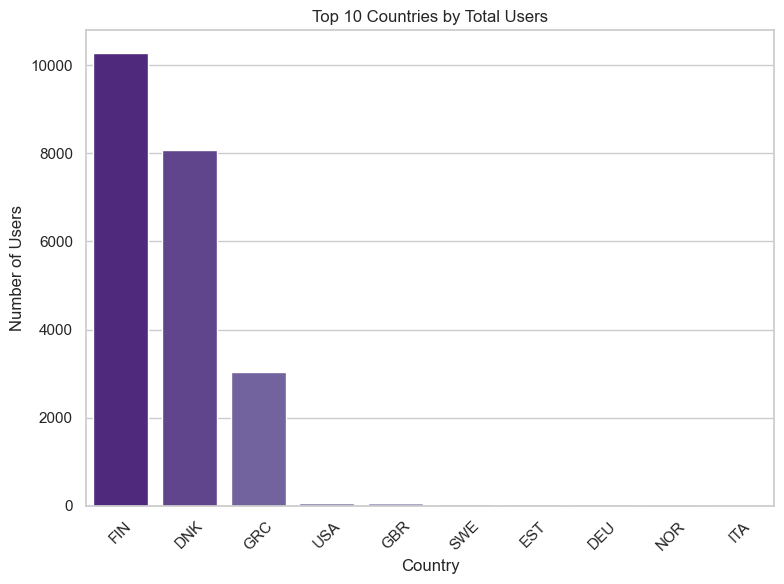

In [153]:
sns.barplot(
    x='REGISTRATION_COUNTRY', 
    y='USER_ID', 
    data=users_top10.reset_index(), 
    hue='REGISTRATION_COUNTRY', 
    palette=sns.color_palette('Purples', n_colors=10)[::-1], 
    legend=False
)
plt.title('Top 10 Countries by Total Users')
plt.ylabel('Number of Users')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/kd/_v4w82350msg_f4j5bjw0s000000gn/T/ipykernel_7148/3040641420.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_stats, x='REGISTRATION_COUNTRY', y='Active_Users', palette='Blues_d')


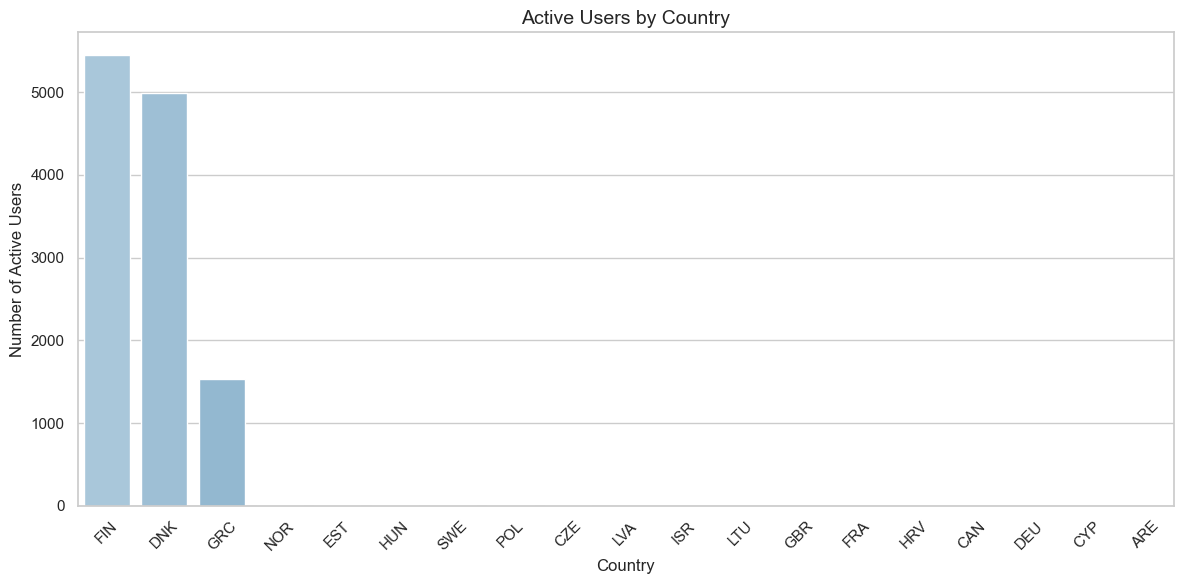

In [309]:
import matplotlib.ticker as mtick
#Active users by country
plt.figure(figsize=(12,6))
sns.barplot(data=country_stats, x='REGISTRATION_COUNTRY', y='Active_Users', palette='Blues_d')
plt.title("Active Users by Country", fontsize=14)
plt.ylabel("Number of Active Users")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/kd/_v4w82350msg_f4j5bjw0s000000gn/T/ipykernel_7148/2556909218.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


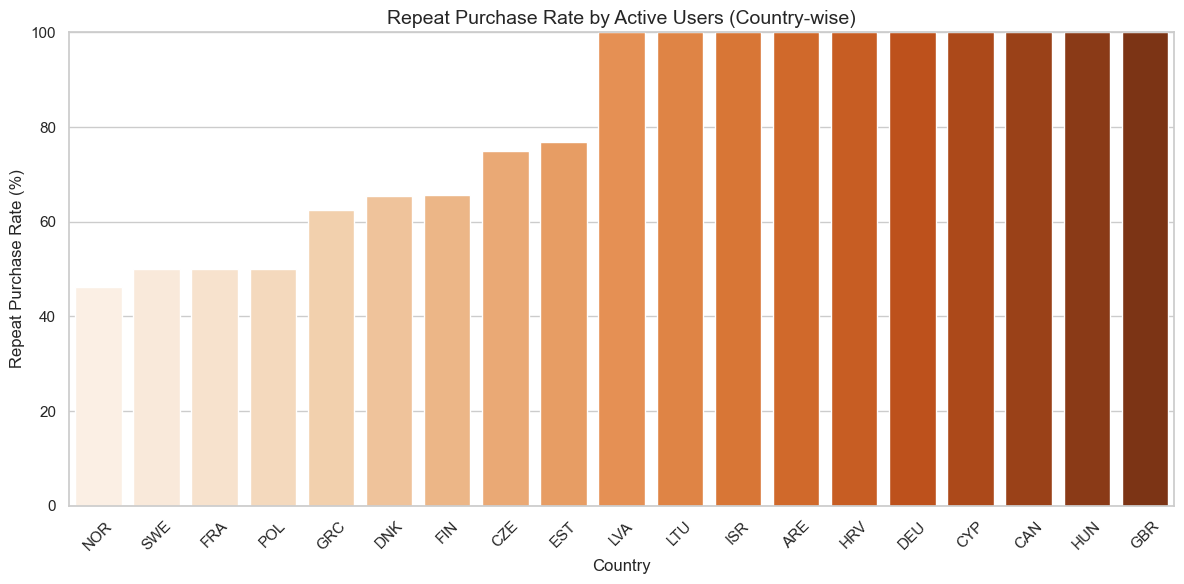

In [301]:

# Filter active users only
active_users = purchase_info[purchase_info['PURCHASE_COUNT'] > 0]

# Group by country and calculate repeat purchase rate
repeat_rate_by_country = active_users.groupby('REGISTRATION_COUNTRY').agg(
    Total_Users=('USER_ID', 'count'),
    Repeat_Users=('PURCHASE_COUNT', lambda x: (x > 1).sum())
).reset_index()

repeat_rate_by_country['Repeat_Rate (%)'] = (repeat_rate_by_country['Repeat_Users'] / repeat_rate_by_country['Total_Users']) * 100

# Sort countries by repeat rate descending for better visualization
repeat_rate_by_country = repeat_rate_by_country.sort_values(by='Repeat_Rate (%)', ascending=True)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=repeat_rate_by_country,
    x='REGISTRATION_COUNTRY',
    y='Repeat_Rate (%)',
    palette='Oranges'
)

plt.title('Repeat Purchase Rate by Active Users (Country-wise)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Repeat Purchase Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#### Revenue Leaders vs. User Base:
Top Revenue Countries (e.g., Denmark, Finland, Greece) generate disproportionately high revenue (up to €1M+) despite not always having the largest user bases (e.g., Greece ranks high in revenue but mid-tier in users).
These markets have high monetization potential per user. We should consider focusing on retaining and upselling in these countries.

#### High AOV Markets:    
Countries like Denmark,Norway, Sweden have the highest average order values (€30–35) but may not be top revenue generators.Users in these markets spend more per order but might lack volume. Test strategies to increase order frequency (e.g., subscription models, time-sensitive deals).

#### Underperforming Markets:
Countries like Estonia, Latvia, Czech appear in AOV but not in revenue rankings or top 10 users. top 10s.These may be efficient, high-margin markets (modest user base but strong spenders). 
Opportunity: Scaling marketing here can be considered.


#### Now lets check if there is any correlation between payment method with order frequency and delivery distance.

Order Frequency and Distance by Payment Method Validity:
                              PURCHASE_COUNT         \
                                        mean median   
USER_HAS_VALID_PAYMENT_METHOD                         
False                               1.662921    0.0   
True                                6.549947    3.0   

                              AVERAGE_DELIVERY_DISTANCE_KMS         
                                                       mean median  
USER_HAS_VALID_PAYMENT_METHOD                                       
False                                              5.986697  6.032  
True                                               5.943636  5.862  


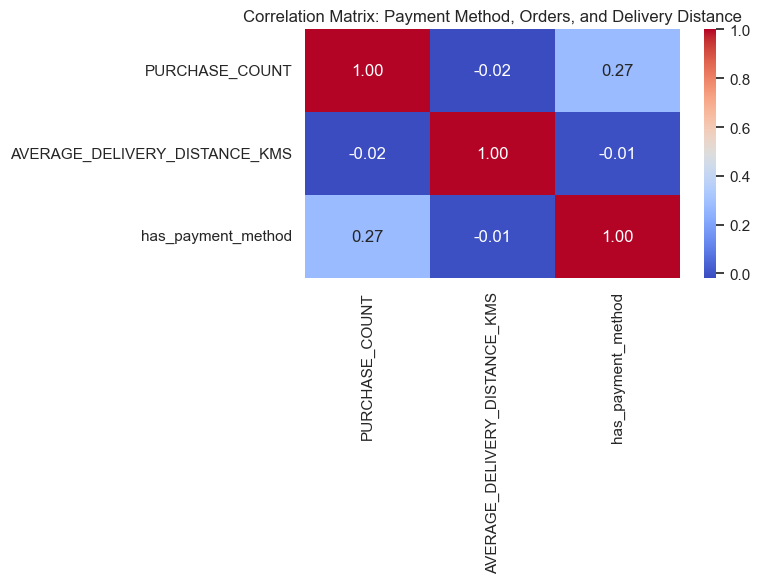

In [156]:
#6.10 Correlation: Payment, Orders & Distance
# Analyze correlation of payment method with order frequency and delivery distance

# Grouped stats
payment_corr = purchase_info.groupby('USER_HAS_VALID_PAYMENT_METHOD').agg({
    'PURCHASE_COUNT': ['mean', 'median'],
    'AVERAGE_DELIVERY_DISTANCE_KMS': ['mean', 'median']
})

print("Order Frequency and Distance by Payment Method Validity:")
print(payment_corr)

# Correlation matrix for numeric relationships
corr_data = purchase_info[['PURCHASE_COUNT', 'AVERAGE_DELIVERY_DISTANCE_KMS']].copy()
corr_data['has_payment_method'] = purchase_info['USER_HAS_VALID_PAYMENT_METHOD'].astype(int)

corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Payment Method, Orders, and Delivery Distance')
plt.tight_layout()
plt.show()

We find no correlation between Payment Method, Orders frequency and Delivery Distance.

##### k. Most common day to order.

In [159]:
# Filtering only active users with valid day/hour values
day_hour_data = purchase_info[
    (purchase_info['user_active']) &
    (purchase_info['MOST_COMMON_WEEKDAY_TO_PURCHASE'].notna()) &
    (purchase_info['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].notna())
]

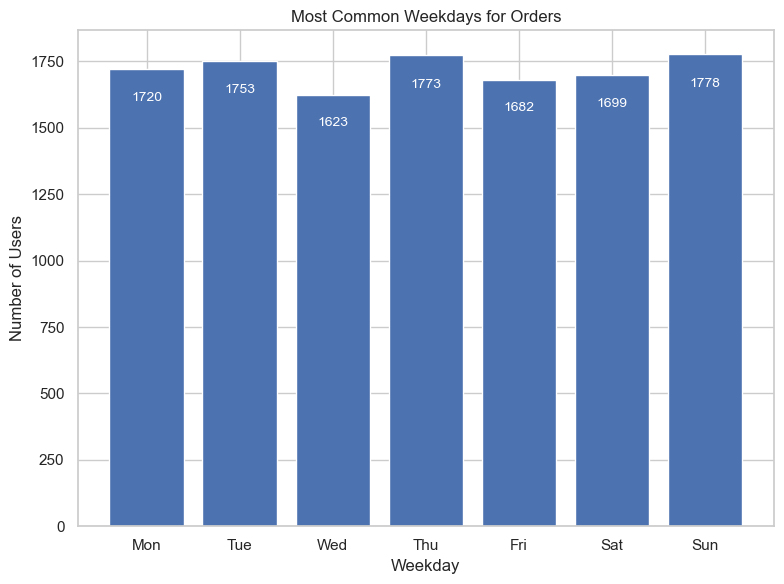

In [160]:
# Plot 1: Most Common Weekdays
weekday_counts = day_hour_data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

bars = plt.bar(weekday_labels, weekday_counts)
plt.title('Most Common Weekdays for Orders')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - (0.05 * height), f'{int(height)}', ha='center', va='top', color='white', fontsize=10)
plt.tight_layout()
plt.show()

 No such conclusive result can be drawn from this visualisation, the no. of users are fairly same for the weekdays.

#### Lets check the revenue generated in these days.

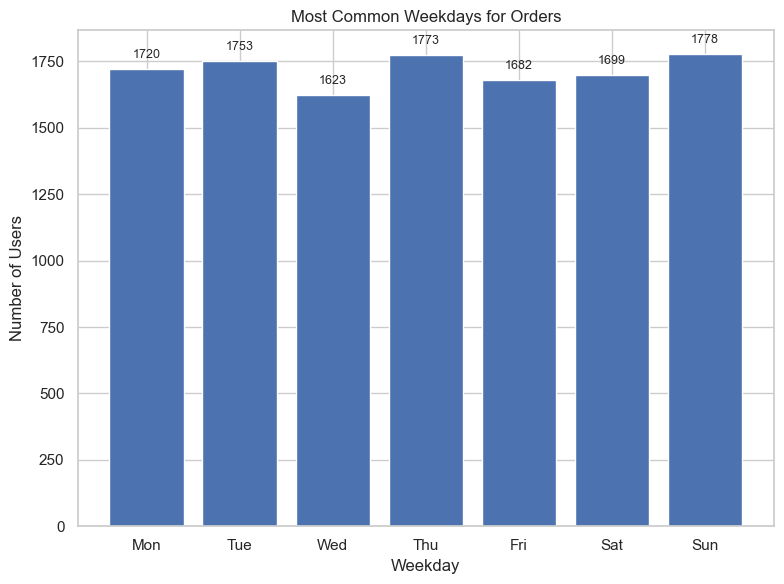

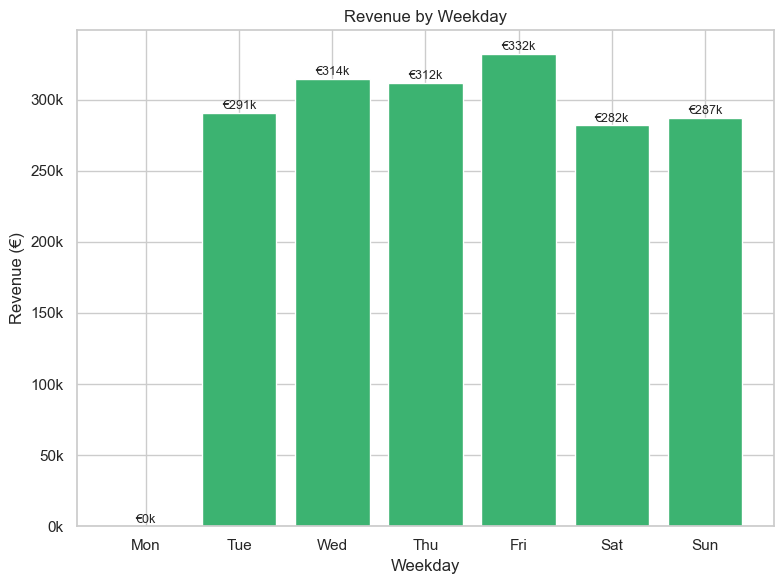

In [163]:
# Plot 1: Most Common Weekdays - User Count
weekday_counts = day_hour_data['MOST_COMMON_WEEKDAY_TO_PURCHASE'].value_counts().sort_index()
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

bars = plt.bar(weekday_labels, weekday_counts)
plt.title('Most Common Weekdays for Orders')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
for i, bar in enumerate(bars):
    user_count = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 30, f"{user_count}", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

# Plot 1b: Weekday Revenue
import matplotlib.ticker as mtick

weekday_revenue = day_hour_data.groupby('MOST_COMMON_WEEKDAY_TO_PURCHASE')['TOTAL_PURCHASES_EUR'].sum().reindex(range(7)).fillna(0)
plt.bar(weekday_labels, weekday_revenue, color='mediumseagreen')
plt.title('Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Revenue (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
for i, revenue in enumerate(weekday_revenue):
    plt.text(i, revenue + 500, f"€{revenue/1000:.0f}k", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


 Interesting thing that we noticed here is that although the no.of users on Friday is less but it has the maximum value of revenue generated, probably because of upcoming weekend.

##### l.Most Common Hours

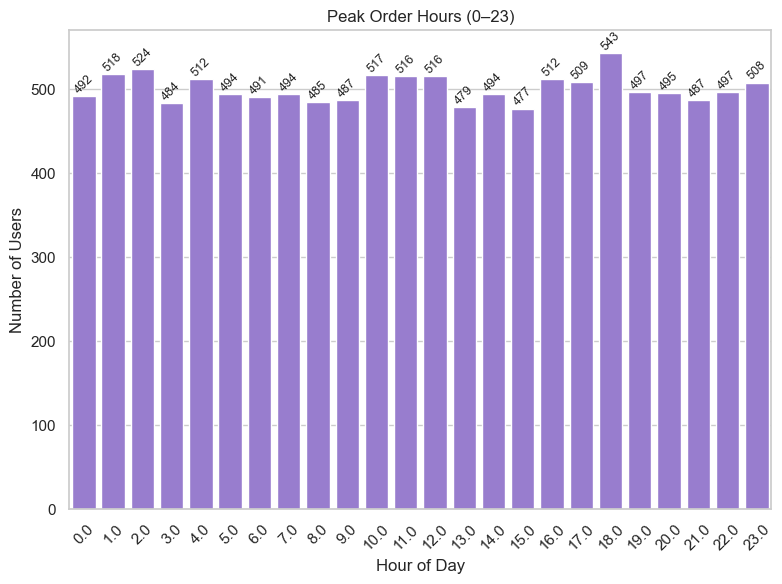

In [166]:
# Plot 2: Most Common Hours
hour_counts = day_hour_data['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE'].value_counts().sort_index()
barplot = sns.barplot(x=hour_counts.index, y=hour_counts.values, color='mediumpurple')
plt.title('Peak Order Hours (0–23)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Users')
barplot.bar_label(barplot.containers[0], labels=[f'{int(val)}' for val in hour_counts.values], label_type='edge', rotation=45, fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

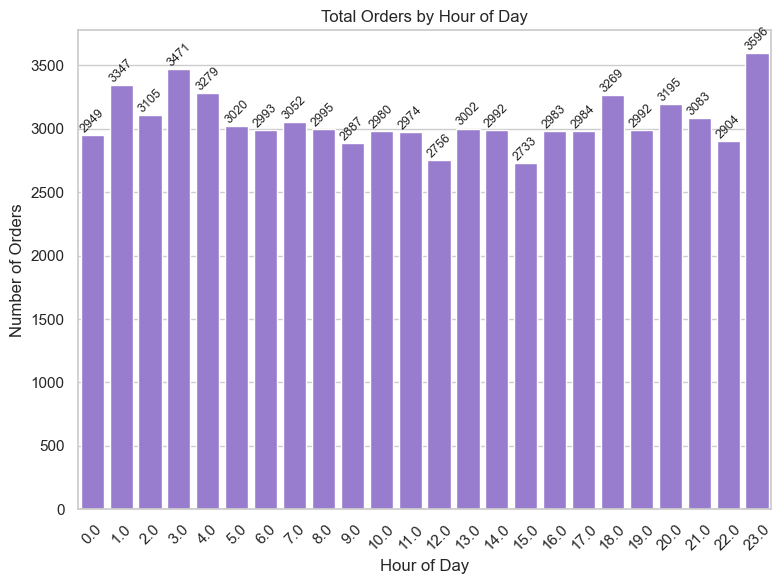

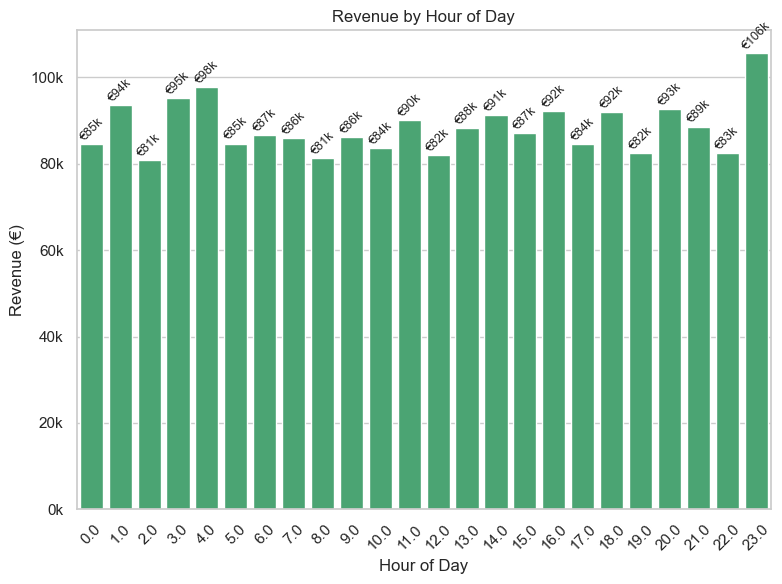

In [167]:
# Plot 2a: Most Common Hours - Order Count
hour_order_counts = day_hour_data.groupby('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')['PURCHASE_COUNT'].sum().sort_index()
barplot = sns.barplot(x=hour_order_counts.index, y=hour_order_counts.values, color='mediumpurple')
plt.title('Total Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
barplot.bar_label(barplot.containers[0], labels=[f'{int(val)}' for val in hour_order_counts.values], label_type='edge', rotation=45, fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2b: Revenue by Hour of Day
hour_revenue = day_hour_data.groupby('MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE')['TOTAL_PURCHASES_EUR'].sum().sort_index()
barplot = sns.barplot(x=hour_revenue.index, y=hour_revenue.values, color='mediumseagreen')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}k'))
barplot.bar_label(barplot.containers[0], labels=[f'€{val/1000:.0f}k' for val in hour_revenue.values], label_type='edge', rotation=45, fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Another interesting insight is that although the no.of users during 23:00 hours is less but the no.of orders and revenue generated is highest at late night hours.

##### Now let's look into some of the important KPIs for the business.

# 5. Important KPIs

#### The KPIs that are important for the business are:
##### 1.Total Completed Orders - North Star Metric
##### 2.Average Order per active user 
##### 3.Retention Rate
##### 4.Average days to First Order
##### 5.Average Revenue per Active User (ARPAU)
##### 6.Delivery vs Takeaway Share
##### 7.Churn Rate Estimate



#### The North Star Metric is: Total Number of Completed Orders, because it directly reflects how much value the platform is delivering to both users and vendors.

##### 1.Total Completed Orders

In [174]:
# Calculate total completed orders
total_completed_orders = purchase_info['PURCHASE_COUNT'].sum()
print(f"North Star Metric - Total Completed Orders: {int(total_completed_orders):,}")

North Star Metric - Total Completed Orders: 73,541


##### 2. Average Order per active user

In [176]:
average_orders_active = purchase_info[purchase_info['user_active']]['PURCHASE_COUNT'].mean()
print(f"Average Orders per Active User: {average_orders_active:.2f}")

Average Orders per Active User: 6.11


##### 3. Retention Rate

In [178]:
# retained_users are those who have ordered more than once
retained_users = (purchase_info['PURCHASE_COUNT'] > 1).sum() 
# users_with_orders are those who have made atleast one order
users_with_orders = purchase_info['user_active'].sum()
retention_rate = retained_users / users_with_orders * 100
print(f"Retention Rate: {retention_rate:.2f}%")

Retention Rate: 65.26%


##### 4. Average days to First Order

In [180]:
avg_days_to_first_order = purchase_info['days_to_first_order'].mean()
print(f"Average Days to First Order: {avg_days_to_first_order:.2f} days")


Average Days to First Order: 68.41 days


##### 5. Average Revenue per Active User (ARPAU)

In [182]:
# How much revenue is generated by each active user on average
arpau = purchase_info[purchase_info['user_active']]['TOTAL_PURCHASES_EUR'].sum() / purchase_info['user_active'].sum()
print(f"Average Revenue per Active User (ARPAU): €{arpau:.2f}")

Average Revenue per Active User (ARPAU): €176.21


##### 6. Delivery vs Takeaway Share

In [184]:
# What percentage of total orders are delivery vs takeaway
delivery_share = (purchase_info['PURCHASE_COUNT_DELIVERY'].sum() / purchase_info['PURCHASE_COUNT'].sum()) * 100
takeaway_share = (purchase_info['PURCHASE_COUNT_TAKEAWAY'].sum() / purchase_info['PURCHASE_COUNT'].sum()) * 100

print(f"Delivery Order Share: {delivery_share:.2f}%")
print(f"Takeaway Order Share: {takeaway_share:.2f}%")


Delivery Order Share: 93.91%
Takeaway Order Share: 6.09%


##### 7. Churn Rate Estimate

In [186]:
# Users with more than 90 days of inactivity after the last order
latest_date = purchase_info['LAST_PURCHASE_DAY'].max()
purchase_info['days_since_last_purchase'] = (latest_date - purchase_info['LAST_PURCHASE_DAY']).dt.days
# Logic for churned users is that the user is active and days since last purchase is more than 90days
churned_users = purchase_info[(purchase_info['user_active']) & (purchase_info['days_since_last_purchase'] > 90)]
# output of purchase_info['user_active']) is a bool value so len(churned_users) is used to calculate churn_rate 
churn_rate = len(churned_users) / purchase_info['user_active'].sum() * 100
print(f"Churn Rate (inactive for 90+ days): {churn_rate:.2f}%")


Churn Rate (inactive for 90+ days): 60.79%


#### After analysing our data and calculating the key KPIs we are now headed to summarise the important data insights and recommendations for the business.

# Business Insights

### 1. User Behavior & Engagement

a. Activation Rate (54.72%): Nearly half of registered users never place an order, indicating potential barriers (e.g., onboarding friction, payment issues).

b. Purchase Frequency:
- Median user orders once every 40 days (monthly).
- 75% of users order ≤6 times, while 109 "power users" (50+ orders) drive significant revenue.
- Greece has the highest purchase count (320 orders by one user), likely a business account.

c. Days to First Order:
- 68% of users place their first order within 10 days—critical for conversion.
- After 10 days, conversion likelihood drops sharply.

### 2. Revenue & Monetization

a. Average Order Value (AOV):
- €30–€50 is the most common spend range.
- Web users spend the most per order (highest AOV), despite being the smallest segment.
- iOS drives the highest total revenue (€932K) due to its large user base (~9,700).

b. Delivery vs. Takeaway:
- 94% of orders are delivery, while only 6% are takeaway.

c. Country Performance:
- Denmark, Finland, and Greece generate the most revenue.
- Norway has the highest purchase frequency (every 33.6 days).
- Denmark has the lowest frequency (69 days), suggesting retention issues.

### 3. Operational Insights

a. Peak Order Times:
- Lunch & dinner dominate (highest volume).
- Late-night (23:00) has fewer users but high order volume & revenue, possibly due to fewer alternatives.

b. Weekday Trends:
- Friday has the highest revenue, likely due to weekend demand.

c. Delivery Distance:
- Most orders are within 3–9 km, but outliers suggest some long-distance deliveries.

### 4. Payment & Conversion

a. Valid Payment Method = Higher Activation:
- Users with valid payment methods are far more likely to convert.
- Some payment methods have <10% activation, while others reach 80%.

### 5. Retention & Churn

a. Retention Rate (65.26%):
- 65% of active users order more than once.

b. Churn Rate (60.79%):
- 61% of active users haven’t ordered in 90+ days, indicating a need for re-engagement strategies.


# Recommendations

### Marketing & User Acquisition
#### a. Improve Activation Rate
- First-order incentives: Discounts for first-time users (e.g., "€5 off first order").
- Simplify onboarding: Reduce steps to first purchase (e.g., guest checkout).

#### b. Retarget Inactive Users
- "We miss you" campaigns: Offer discounts to users who haven’t ordered in 30+ days.
- Personalized recommendations: Highlight new restaurants based on past orders.

#### c. Leverage High-Value Segments
- Web users (highest AOV): Target with premium offers (e.g., free delivery on large orders).
- Power users (50+ orders): Introduce loyalty programs (e.g., VIP tiers).

#### d. Boost Underperforming Markets
- Denmark & Finland (low frequency): Test subscription models (e.g., "Unlimited delivery for €9.99/month").
- Estonia & Latvia (high AOV but low volume): Scale marketing to attract more users.

### Operations & Logistics
#### a. Optimize Delivery for Peak Times
- Lunch & dinner: Ensure fastest delivery times (prioritize driver allocation).
- Late-night (23:00): Partner with 24/7 restaurants to capitalize on demand.

#### b. Enhance Mobile Experience
- iOS & Android dominate: Improve app performance (e.g., one-click reordering).
- Web users (high AOV): Offer exclusive desktop promotions.

### Product & UX Improvements
#### a. Improve Payment Success Rates
- Highlight top-performing payment methods (e.g., digital wallets) at checkout.
- Retry failed payments: Notify users to update expired cards.

#### b. Encourage Faster First Orders
- Time-sensitive deals: "Order within 48 hours for 20% off!"
- Push notifications: Remind users of their abandoned carts.


# Conclusion

The Food Delivery business's biggest opportunities lies in:
- Boosting activation (simpler onboarding, first-order incentives).

- Retaining high-value users (loyalty programs, personalized offers).

- Optimizing delivery for peak demand (lunch, dinner, late-night).

- Improving payment success to reduce drop-offs.

By focusing on these areas, the business can increase revenue, reduce churn, and enhance customer lifetime value (LTV).
